# Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

import requests
from urllib.parse import urlparse
import os

import logging

In [2]:
logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s [%(levelname)s] %(message)s",
    datefmt="%H:%M:%S"
)

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By

# Sample Images

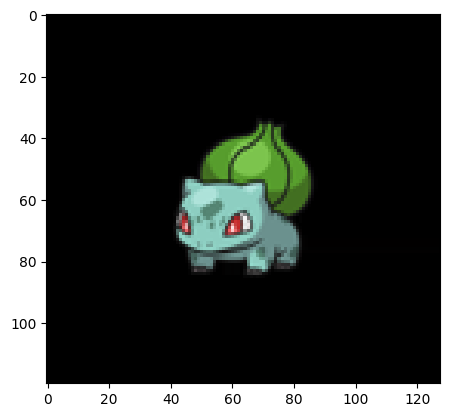

In [4]:
img = cv2.imread('sample-downloaded-images/bulbasaur2.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img, cmap='plasma')

In [ ]:
def get_pokemon_names(driver):
    """Returns the list of pokemon names. The names will be used to get
    each individual image.
    """
    pokemon_path = 'https://pokemondb.net/sprites/'
    driver.get(pokemon_path)
    elem = driver.find_elements(By.CLASS_NAME, 'infocard')
    
    names = []
    for n in elem:
        name = n.text.lower().replace('-', )
        names.append(name)
  
    return names


def get_hrefs_per_pokemon(pokemon_name, driver):
    """Returns the list of hrefs of pokemon images.
    """
    pokemon_path = 'https://pokemondb.net/sprites/'
    driver.get(f'{pokemon_path}/{pokemon_name}')
    elem = driver.find_elements(By.CLASS_NAME, 'sprite-share-link')

    hrefs = []
    for e in elem:
        image_href = e.get_attribute('href')
        is_back_image = 'back' in image_href.lower()
        hrefs.append(image_href) if not is_back_image else None

    hrefs = list(set(hrefs))

    return hrefs


def download_image(href, to='images'):
    """Downloads the image 
    """
    response = requests.get(href)
    parsed_url = urlparse(href)
    image_name = parsed_url.path.replace('/', '_')[1:]
    image_path = os.path.join(os.getcwd(), to, image_name)

    with open(image_path, 'wb') as f:
        f.write(response.content)





In [ ]:
def main():
    driver = webdriver.Chrome()
    n_downloaded = 0

    pokemon_names = get_pokemon_names(driver=driver)
    logging.info(f'Extracted {len(pokemon_names)} pokemon names')

    for i, pokemon_name in enumerate(pokemon_names):

        image_path = f'images/{i} - {pokemon_name}'
        if not os.path.exists(image_path):
            os.makedirs(image_path)

        hrefs = get_hrefs_per_pokemon(pokemon_name=pokemon_name, 
                                      driver=driver)
        logging.info(f'Downloading - {pokemon_name}')
        n_image_of_one_pokemon = 0

        for href in hrefs:
            try:
                download_image(href, to=image_path)
                n_image_of_one_pokemon += 1
            except Exception as e:
                logging.info(e)

        logging.info((f'Downloaded - {n_image_of_one_pokemon} \
                      images of {pokemon_name}'))
        n_downloaded += n_image_of_one_pokemon

    logging.info(f'Downloaded {n_downloaded} total images')

In [30]:
main()

09:16:06 [INFO] Extracted 1025 pokemon names
09:16:07 [INFO] Downloading - bulbasaur
09:16:12 [INFO] Downloaded - 46 images of bulbasaur
09:16:13 [INFO] Downloading - ivysaur
09:16:17 [INFO] Downloaded - 40 images of ivysaur
09:16:19 [INFO] Downloading - venusaur
09:16:27 [INFO] Downloaded - 77 images of venusaur
09:16:28 [INFO] Downloading - charmander
09:16:33 [INFO] Downloaded - 46 images of charmander
09:16:34 [INFO] Downloading - charmeleon
09:16:38 [INFO] Downloaded - 42 images of charmeleon
09:16:39 [INFO] Downloading - charizard
09:16:48 [INFO] Downloaded - 68 images of charizard
09:16:48 [INFO] Downloading - squirtle
09:16:53 [INFO] Downloaded - 48 images of squirtle
09:16:54 [INFO] Downloading - wartortle
09:16:59 [INFO] Downloaded - 44 images of wartortle
09:17:00 [INFO] Downloading - blastoise
09:17:06 [INFO] Downloaded - 60 images of blastoise
09:17:07 [INFO] Downloading - caterpie
09:17:11 [INFO] Downloaded - 41 images of caterpie
09:17:12 [INFO] Downloading - metapod
09:

KeyboardInterrupt: 

In [33]:
if not os.path.exists('test'):
    os.makedirs('test/test.csv')

In [134]:
# response = requests.get(hrefs[36])
# img_bytes = np.asarray(bytearray(response.content), dtype=np.uint8)
# img = cv2.imdecode(img_bytes, cv2.IMREAD_COLOR)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# plt.imshow(img)

In [ ]:
https://pokemondb.net/sprites//kakuna


In [130]:
for href in hrefs:
    download_image(href, to='images/bulbasaur')

In [39]:
import csv

sample = [
    {'name': 'abc', 'n_image': 2},
    {'name': 'abc2', 'n_image': 23},
]

with open('tes2t.csv', 'r', newline='') as f:
    writer = csv.DictWriter(f, fieldnames=sample[0].keys())
    writer.writeheader()

    for row in sample:
        writer.writerow(row)


UnsupportedOperation: not writable

In [ ]:
os.path.getsize()